(8, 2000)


c:\Users\Ray\anaconda3\lib\site-packages\scipy\integrate\_ivp\base.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


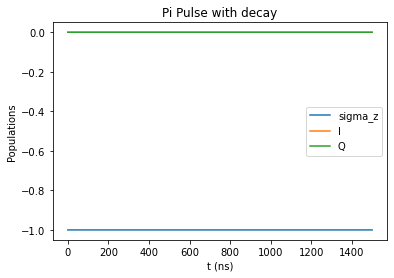

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# from odeintw import odeintw


def cavity_bloch_equations(t, y, *args):
    """

    :param y:
    :param t:
    :param args: (delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi)
    :return:
    """

    delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi = args

    a = y[0]
    sigmaz = y[1]
    sigmax = y[2]
    sigmay = y[3]
    a_sigmaz = y[4]
    a_sigmax = y[5]
    a_sigmay = y[6]
    adagger_a = y[7]

    ydot = np.array([0j] * len(y))

    ydot[0] = -1j * delta_rm * a - 1j * chi * a_sigmaz - 1j * epsilon_m - kappa / 2 * a
    ydot[1] = Omega * sigmay - gamma_1 * (1 + sigmaz)
    ydot[2] = -(delta_as + 2 * chi * (adagger_a + 1 / 2)) * sigmay - (gamma_1 / 2 + gamma_phi) * sigmax
    ydot[3] = (delta_as + 2 * chi * (adagger_a + 1 / 2)) * sigmax - (gamma_1 / 2 + gamma_phi) * sigmay - Omega * sigmaz
    ydot[
        4] = -1j * delta_rm * a_sigmaz - 1j * chi * a + Omega * a_sigmay - 1j * epsilon_m * sigmaz - gamma_1 * a - (
                gamma_1 + kappa / 2) * a_sigmaz
    ydot[5] = -1j * delta_rm * a_sigmax - (
                delta_as + 2 * chi * (adagger_a + 1)) * a_sigmay - 1j * epsilon_m * sigmax - (
                          gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmax
    ydot[6] = -1j * delta_rm * a_sigmay + (
                delta_as + 2 * chi * (adagger_a + 1)) * a_sigmax - 1j * epsilon_m * sigmay - (
                          gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmay - Omega * a_sigmaz
    ydot[7] = -2 * epsilon_m * np.imag(a) - kappa * adagger_a

    return ydot

def cavity_bloch_equations_short_pulse(t, y, *args):
    """

    :param y:
    :param t:
    :param args: (delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi)
    :return:
    """

    delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi = args

    t1 = 100
    t2 = t1 + 10
    if not t1 < t < t2:
        Omega = 0

    a = y[0]
    sigmaz = y[1]
    sigmax = y[2]
    sigmay = y[3]
    a_sigmaz = y[4]
    a_sigmax = y[5]
    a_sigmay = y[6]
    adagger_a = y[7]

    ydot = np.array([0j] * len(y))

    ydot[0] = -1j * delta_rm * a - 1j * chi * a_sigmaz - 1j * epsilon_m - kappa / 2 * a
    ydot[1] = Omega * sigmay - gamma_1 * (1 + sigmaz)
    ydot[2] = -(delta_as + 2 * chi * (adagger_a + 1 / 2)) * sigmay - (gamma_1 / 2 + gamma_phi) * sigmax
    ydot[3] = (delta_as + 2 * chi * (adagger_a + 1 / 2)) * sigmax - (gamma_1 / 2 + gamma_phi) * sigmay - Omega * sigmaz
    ydot[
        4] = -1j * delta_rm * a_sigmaz - 1j * chi * a + Omega * a_sigmay - 1j * epsilon_m * sigmaz - gamma_1 * a - (
                gamma_1 + kappa / 2) * a_sigmaz
    ydot[5] = -1j * delta_rm * a_sigmax - (
                delta_as + 2 * chi * (adagger_a + 1)) * a_sigmay - 1j * epsilon_m * sigmax - (
                          gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmax
    ydot[6] = -1j * delta_rm * a_sigmay + (
                delta_as + 2 * chi * (adagger_a + 1)) * a_sigmax - 1j * epsilon_m * sigmay - (
                          gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmay - Omega * a_sigmaz
    ydot[7] = -2 * epsilon_m * np.imag(a) - kappa * adagger_a

    return ydot


def cavity_bloch_equations_resonant_time_drive(t, y, *args):
    """

    uses delta_as = - 2*chi*(adagger_a + 1/2)

    :param y:
    :param t:
    :param args: (delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi)
    :return:
    """

    delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi = args

    a = y[0]
    sigmaz = y[1]
    sigmax = y[2]
    sigmay = y[3]
    a_sigmaz = y[4]
    a_sigmax = y[5]
    a_sigmay = y[6]
    adagger_a = y[7]

    ydot = np.array([0j] * len(y))

    ydot[0] = -1j * delta_rm * a - 1j * chi * a_sigmaz - 1j * epsilon_m - kappa / 2 * a
    ydot[1] = Omega * sigmay - gamma_1 * (1 + sigmaz)
    ydot[2] = - (gamma_1 / 2 + gamma_phi) * sigmax
    ydot[3] = - (gamma_1 / 2 + gamma_phi) * sigmay - Omega * sigmaz
    ydot[
        4] = -1j * delta_rm * a_sigmaz - 1j * chi * a + Omega * a_sigmay - 1j * epsilon_m * sigmaz - gamma_1 * a - (
            gamma_1 + kappa / 2) * a_sigmaz
    ydot[5] = -1j * delta_rm * a_sigmax - chi * a_sigmay - 1j * epsilon_m * sigmax - (
            gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmax
    ydot[6] = -1j * delta_rm * a_sigmay + chi * a_sigmax - 1j * epsilon_m * sigmay - (
            gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmay - Omega * a_sigmaz
    ydot[7] = -2 * epsilon_m * np.imag(a) - kappa * adagger_a

    return ydot


def cavity_bloch_equations_resonant_time_drive_short_pulse(t, y, *args):
    """

    uses delta_as = - 2*chi*(adagger_a + 1/2)
    Pi pulse only happens between t1 and t2

    :param y:
    :param t:
    :param args: (delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi)
    :return:
    """
    # print(t)
    delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi = args

    t1 = 100
    t2 = t1 + 10
    if not t1 < t < t2:
        Omega = 0

    a = y[0]
    sigmaz = y[1]
    sigmax = y[2]
    sigmay = y[3]
    a_sigmaz = y[4]
    a_sigmax = y[5]
    a_sigmay = y[6]
    adagger_a = y[7]

    ydot = np.array([0j] * len(y))

    ydot[0] = -1j * delta_rm * a - 1j * chi * a_sigmaz - 1j * epsilon_m - kappa / 2 * a
    ydot[1] = Omega * sigmay - gamma_1 * (1 + sigmaz)
    ydot[2] = - (gamma_1 / 2 + gamma_phi) * sigmax
    ydot[3] = - (gamma_1 / 2 + gamma_phi) * sigmay - Omega * sigmaz
    ydot[
        4] = -1j * delta_rm * a_sigmaz - 1j * chi * a + Omega * a_sigmay - 1j * epsilon_m * sigmaz - gamma_1 * a - (
            gamma_1 + kappa / 2) * a_sigmaz
    ydot[5] = -1j * delta_rm * a_sigmax - chi * a_sigmay - 1j * epsilon_m * sigmax - (
            gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmax
    ydot[6] = -1j * delta_rm * a_sigmay + chi * a_sigmax - 1j * epsilon_m * sigmay - (
            gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmay - Omega * a_sigmaz
    ydot[7] = -2 * epsilon_m * np.imag(a) - kappa * adagger_a

    return ydot

def cavity_bloch_equations_resonant_time_drive_short_pulse_test(t, y, *args):
    """

    uses delta_as = - 2*chi*(adagger_a + 1/2)
    Pi pulse only happens between t1 and t2

    :param y:
    :param t:
    :param args: (delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi)
    :return:
    """

    delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi = args

    t1 = 100
    t2 = t1 + 10
    if not t1 < t < t2:
        Omega = 0

    a = y[0]
    sigmaz = y[1]
    sigmax = y[2]
    sigmay = y[3]
    a_sigmaz = y[4]
    a_sigmax = y[5]
    a_sigmay = y[6]
    adagger_a = y[7]

    ydot = np.array([0j] * len(y))

    ydot[0] = -1j * delta_rm * a - 1j * epsilon_m - kappa / 2 * a
    ydot[1] = Omega * sigmay - gamma_1 * (1 + sigmaz)
    ydot[2] = - (gamma_1 / 2 + gamma_phi) * sigmax
    ydot[3] = - (gamma_1 / 2 + gamma_phi) * sigmay - Omega * sigmaz
    ydot[
        4] = -1j * delta_rm * a_sigmaz - 1j * chi * a + Omega * a_sigmay - 1j * epsilon_m * sigmaz - gamma_1 * a - (
            gamma_1 + kappa / 2) * a_sigmaz
    ydot[5] = -1j * delta_rm * a_sigmax - chi * a_sigmay - 1j * epsilon_m * sigmax - (
            gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmax
    ydot[6] = -1j * delta_rm * a_sigmay + chi * a_sigmax - 1j * epsilon_m * sigmay - (
            gamma_1 / 2 + gamma_phi + kappa / 2) * a_sigmay - Omega * a_sigmaz
    ydot[7] = -2 * epsilon_m * np.imag(a) - kappa * adagger_a

    return ydot


def figure2(*args):
    # for this experiment

    omega_r, kappa, omega_a, g, chi, gamma_1, gamma_phi = args

    epsilon_m = np.sqrt(kappa / 2)
    omega_m = omega_r - chi

    omega_s = omega_a + chi
    delta_as = omega_a - omega_s
    delta_rm = omega_r - omega_m

    # print(delta_as)
    # print(kappa/2/np.pi)
    # print(chi/2/np.pi)

    # Omega = 0.05 * 2 * np.pi
    Omega = 0

    # epsilon_m = 0
    # gamma_1 = 0
    # gamma_phi = 0

    args = delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi

    # initial variables

    # alpha = 1j
    alpha = 1j

    a0 = 0
    sigmaz0 = -1
    sigmax0 = 0
    sigmay0 = 0
    a_sigmaz0 = a0*sigmaz0
    a_sigmax0 = a0*sigmax0
    a_sigmay0 = a0*sigmay0
    adagger_a0 = 0

    y0 = np.array([a0, sigmaz0, sigmay0, sigmax0, a_sigmaz0, a_sigmay0, a_sigmax0, adagger_a0])

    num_points = 2000
    tspan = (0, 1500)
    times = np.linspace(*tspan, num_points)
    # y, infodict = odeintw(cavity_bloch_equations_resonant_time_drive_short_pulse, y0, times, args=args,
    #                       full_output=True)


    # result = solve_ivp(cavity_bloch_equations_short_pulse, tspan, y0, method="DOP853", t_eval=times, args=args, max_step=1, dense_output=True)
    # result = solve_ivp(cavity_bloch_equations_resonant_time_drive_short_pulse_test, tspan, y0, t_eval=times, args=args, max_step=1)
    # result = solve_ivp(cavity_bloch_equations_resonant_time_drive_short_pulse_test, tspan, y0, t_eval=times, args=args)

    result = solve_ivp(cavity_bloch_equations_resonant_time_drive_short_pulse, tspan, y0, t_eval=times, args=args)

    y = result.y

    print(y.shape)

    a = y[0, :]
    sigmaz = np.real(y[1, :])
    sigmax = np.real(y[2, :])
    sigmay = np.real(y[3, :])
    a_sigmaz = y[4, :]
    a_sigmax = y[5, :]
    a_sigmay = y[6, :]
    adagger_a = np.real(y[7, :])

    plt.plot(result.t, sigmaz, label="sigma_z")
    # plt.plot(result.t, adagger_a, label="adag a")
    plt.plot(result.t, np.real(a), label="I")
    plt.plot(result.t, np.imag(a), label="Q")

    plt.xlabel("t (ns)")
    plt.ylabel("Populations")

    plt.title("Pi Pulse with decay")

    plt.legend()
    plt.show()

    


def cavity_bloch_numerical():
    # all in GHz

    omega_r = 6.44252 * 2 * np.pi
    kappa = 0.00169 * 2 * np.pi

    omega_a = 4.009 * 2 * np.pi

    g = 0.134 * 2 * np.pi

    chi = -0.00069 * 2 * np.pi

    gamma_1 = 0.00019 * 2 * np.pi

    # gamma_phi not given
    gamma_phi = 2 * gamma_1

    figure2(omega_r, kappa, omega_a, g, chi, gamma_1, gamma_phi)

cavity_bloch_numerical()

0.004335397861954249
0.00169
-0.00069
(8, 2000)


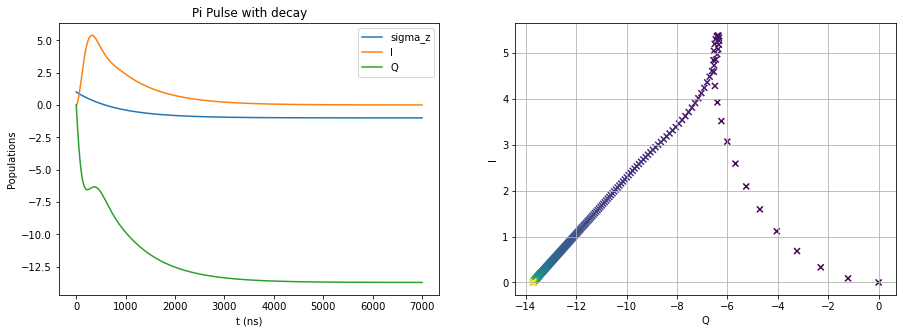

a (0.0018516191922268886-13.721007716563628j)
adagger_a 188.30228758698073


In [92]:
omega_r = 6.44252 * 2 * np.pi
kappa = 0.00169 * 2 * np.pi

omega_a = 4.009 * 2 * np.pi

g = 0.134 * 2 * np.pi

chi = -0.00069 * 2 * np.pi

gamma_1 = 0.00019 * 2 * np.pi

# gamma_phi not given
gamma_phi = 2 * gamma_1

epsilon_m = np.sqrt(kappa / 2)
# epsilon_m = 1000
omega_m = omega_r - chi
# omega_m = omega_r + chi

omega_s = omega_a + chi
delta_as = omega_a - omega_s
delta_rm = omega_r - omega_m

print(delta_as)
print(kappa/2/np.pi)
print(chi/2/np.pi)

# Omega = 0.05 * 2 * np.pi
Omega = 0

# epsilon_m = 0
# gamma_1 = 0
# gamma_phi = 0

args = delta_rm, chi, epsilon_m, kappa, Omega, gamma_1, delta_as, gamma_phi

# initial variables

alpha = 1j

a0 = 0j
sigmaz0 = 1
sigmax0 = 0
sigmay0 = 0
a_sigmaz0 = a0*sigmaz0
a_sigmax0 = a0*sigmax0
a_sigmay0 = a0*sigmay0
adagger_a0 = 0

y0 = np.array([a0, sigmaz0, sigmay0, sigmax0, a_sigmaz0, a_sigmay0, a_sigmax0, adagger_a0])

num_points = 2000
tspan = (0, 7000)
times = np.linspace(*tspan, num_points)

result = solve_ivp(cavity_bloch_equations_resonant_time_drive_short_pulse, tspan, y0, t_eval=times, args=args,max_step=1)
# result = solve_ivp(cavity_bloch_equations_short_pulse, tspan, y0, t_eval=times, args=args,max_step=1)


y = result.y

print(y.shape)

a = y[0, :]
sigmaz = np.real(y[1, :])
sigmax = np.real(y[2, :])
sigmay = np.real(y[3, :])
a_sigmaz = y[4, :]
a_sigmax = y[5, :]
a_sigmay = y[6, :]
adagger_a = np.real(y[7, :])

fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(result.t, sigmaz, label="sigma_z")
# ax[0].plot(result.t, adagger_a, label="adag a")
ax[0].plot(result.t, np.real(a), label="I")
ax[0].plot(result.t, np.imag(a), label="Q")

ax[0].set_xlabel("t (ns)")
ax[0].set_ylabel("Populations")

ax[0].set_title("Pi Pulse with decay")

ax[0].legend()


ax[1].scatter(np.imag(a)[::5],np.real(a)[::5],c=result.t[::5],cmap=plt.get_cmap('viridis'),marker='x')
ax[1].set_xlabel('Q')
ax[1].set_ylabel('I')
ax[1].grid()
# ax[1].set_ylim(-1,1)

plt.show()

print('a',a[-1])
print('adagger_a',adagger_a[-1])

In [ ]:
def IQ_rotate(I,Q):
    last_a = I[-1] + 1j*Q[-1]
    


    flip = np.sign(np.mean(post_rotation_Q))
    #rotation, flip

    # return rotation,flip applied to I,Q